# Imports | Read Data | Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from PIL import Image

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
from cf_matrix import make_confusion_matrix

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk

from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [5]:
import json
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
#from wordcloud import WordCloud
import pickle
import re, string
import sys
import seaborn as sns
sns.set()
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
import pickle

In [7]:
pd.set_option('display.max_rows', None)

In [8]:
# Jupyter
# list file and directories
# dir_path = r'C:\UCI\SPRING\275 NLP\Group'
# res = os.listdir(dir_path)
# print(res)

#Colab
# from google.colab import drive
# drive.mount('/content/drive')
# !ls "/content/drive/My Drive/UCI-SPRING/BANA275-NLP"

In [9]:
# df = pd.read_csv("amazon_samples.csv")
df = pd.read_csv("amazon_balanced.csv")
df.shape

(500000, 13)

In [10]:
del df['Unnamed: 0']

In [11]:
df = df[['overall','reviewerID','asin','reviewText','summary','unixReviewTime']]

In [12]:
df.isnull().sum()

overall             0
reviewerID          0
asin                0
reviewText        196
summary           130
unixReviewTime      0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isnull().sum()

overall           0
reviewerID        0
asin              0
reviewText        0
summary           0
unixReviewTime    0
dtype: int64

In [14]:
print(df.columns)
df.shape

Index(['overall', 'reviewerID', 'asin', 'reviewText', 'summary',
       'unixReviewTime'],
      dtype='object')


(499682, 6)

In [15]:
df['combined_text'] = df['reviewText'] + ' ' + df['summary']

In [16]:
del df['reviewText']
del df['summary']
df.head()

,overall,reviewerID,asin,unixReviewTime,combined_text
0,1,A73RNYE4W61RD,B00DSFW5MA,1453766400,Do not but I have purchased two if these now t...
1,1,ABNWJ399U1PEH,B00IUGYTRQ,1458000000,"Stopped working in exactly a week,have two ps4..."
2,1,A1QTWNQUN785VQ,B000EGZJ06,1178841600,I played this game years ago and loved it. I f...
3,1,A2A9LIMFNL0O2C,B00D9EPI38,1429488000,I got the thing and it immediately destroyed m...
4,1,A1RCVQDIOFP6PQ,B0050SYS5A,1322870400,"While the quality of the product is top notch,..."


In [17]:
df['overall'].value_counts()

3    99960
2    99957
4    99947
1    99943
5    99875
Name: overall, dtype: int64

In [18]:
df['target']=[0  if x<=3 else 1 for x in df['overall']]

## Data Preprocessing

In [19]:
# delete special characters: a set of numbers prefixed by &# and suffixed by ;
import html

pattern = r"\&\#[0-9]+\;"
df["preprocessed_text"] = df["combined_text"].str.replace(pat=pattern, repl="", regex=True)

In [20]:
%%time
import re
import string
import nltk

from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

from nltk import word_tokenize, pos_tag
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_treebank_pos_tagger')

from unicodedata import normalize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yiheng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yiheng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yiheng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yiheng/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/yiheng/nltk_data...


CPU times: user 282 ms, sys: 76.2 ms, total: 358 ms
Wall time: 918 ms


[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.


In [21]:
# reduce words to root form - using Lemmatization to reduce tokens to their base word
def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(wordnet_lemmatizer.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(wordnet_lemmatizer.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(wordnet_lemmatizer.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(wordnet_lemmatizer.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root

def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

In [ ]:
df["preprocessed_text"] = df["preprocessed_text"].apply(lambda row: lemmatize_doc(row))

In [ ]:
# remove accents: naive -> naive
remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")
df["accent_text"] = df["preprocessed_text"].apply(remove_accent)

In [ ]:
def tokenization(text):
    tokens = nltk.word_tokenize(text)
    return tokens

stopwords = nltk.corpus.stopwords.words('english')
stopwords += list(string.punctuation)
stopwords += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',"'", '©',
'said',"'s", "also",'one',"n't",'com', 'satirewire', '-', '–', 
'—', '_','satirewire.com',"/"]
stopwords = set(stopwords)
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [ ]:
df["accent_text"][3]

In [ ]:
df['clean_text']= df['accent_text'].apply(lambda x: x.lower())
print("lower the text, over")

In [ ]:
df['clean_text']= df['clean_text'].apply(lambda x: tokenization(x))
print("tokenization step, over")

In [ ]:
df['clean_text'][3]

In [ ]:
df['clean_text']= df['clean_text'].apply(lambda x:remove_stopwords(x))
print("stop word removal, over")
print("Completed")

## Read Processed Data

In [7]:
from ast import literal_eval

In [8]:
df = pd.read_csv("nlp_after_preprocess_v4.csv",converters={"clean_text": literal_eval})

In [9]:
df

,Unnamed: 0,overall,target,clean_text
0,0,1,0,"[purchase, two, first, become, unresponsive, s..."
1,1,1,0,"[stopped, work, exactly, week, two, ps4, work,..."
2,2,1,0,"[play, game, year, ago, love, figure, another,..."
3,3,1,0,"[get, thing, immediately, destroy, favorite, g..."
4,4,1,0,"[quality, product, top, notch, inherent, desig..."
...,...,...,...,...
499677,499995,5,1,"[great, game, even, better, series, merchandis..."
499678,499996,5,1,"[pick, toysrus, yesterday, preorder, receipt, ..."
499679,499997,5,1,"[lot, game, open, world, crazy, cool, wait, ti..."
499680,499998,5,1,"[yeah, pretty, much, perfect, game, perfect, s..."


# Sentiment Analysis - Prediction Models

## 5-Level Prediction

In [157]:
from sklearn.model_selection import train_test_split
X=df['clean_text'].apply(lambda x: ' '.join(x))
y=df['overall']
X_train,X_test,Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Train:',X_train.shape,Y_train.shape,'Test:',(X_test.shape,Y_test.shape))

Train: (349777,) (349777,) Test: ((149905,), (149905,))


In [158]:
df

,Unnamed: 0,overall,target,clean_text
0,0,1,0,"[purchase, two, first, become, unresponsive, s..."
1,1,1,0,"[stopped, work, exactly, week, two, ps4, work,..."
2,2,1,0,"[play, game, year, ago, love, figure, another,..."
3,3,1,0,"[get, thing, immediately, destroy, favorite, g..."
4,4,1,0,"[quality, product, top, notch, inherent, desig..."
...,...,...,...,...
499677,499995,5,1,"[great, game, even, better, series, merchandis..."
499678,499996,5,1,"[pick, toysrus, yesterday, preorder, receipt, ..."
499679,499997,5,1,"[lot, game, open, world, crazy, cool, wait, ti..."
499680,499998,5,1,"[yeah, pretty, much, perfect, game, perfect, s..."


In [159]:
## TFIDF

In [160]:
print('TFIDF Vectorizer……')
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer(max_df = 0.9,ngram_range=(1,1)) #tf-idf matrix with unigram features only
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

TFIDF Vectorizer……


In [15]:
X_train[0]

'purchase two first become unresponsive second work 15 second push joystick direction act like joystick stick run 4 second controller pick try contact mayflaah customer service get response would stay away get driver update buy'

### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
linear_reg = LinearRegression().fit(tf_x_train, Y_train)

In [18]:
y_pred = linear_reg.predict(tf_x_test)

In [19]:
y_pred

array([4.19694652, 2.18337744, 5.02582714, ..., 2.66598056, 2.67737144,
       4.82820088])

In [21]:
y_pred_adjusted = y_pred.copy()

In [23]:
y_pred_adjusted[y_pred_adjusted < 1.5] = 1
y_pred_adjusted[(y_pred_adjusted < 2.5) & (y_pred_adjusted >= 1.5)] = 2
y_pred_adjusted[(y_pred_adjusted < 3.5) & (y_pred_adjusted >= 2.5)] = 3
y_pred_adjusted[(y_pred_adjusted < 4.5) & (y_pred_adjusted >= 3.5)] = 4
y_pred_adjusted[y_pred_adjusted > 4.5] = 5

In [24]:
y_pred_adjusted

array([4., 2., 5., ..., 3., 3., 5.])

In [25]:
accuracy_score(y_pred_adjusted,Y_test)

0.43606951069010375

In [26]:
y_pred_adjusted.mean()

2.998545745638905

In [27]:
unique, counts = np.unique(y_pred_adjusted, return_counts=True)

In [28]:
np.asarray((unique, counts)).T

array([[1.0000e+00, 1.8405e+04],
       [2.0000e+00, 3.5453e+04],
       [3.0000e+00, 4.3159e+04],
       [4.0000e+00, 3.3731e+04],
       [5.0000e+00, 1.9157e+04]])

In [34]:
conf_matrix = confusion_matrix(Y_test, y_pred_adjusted)

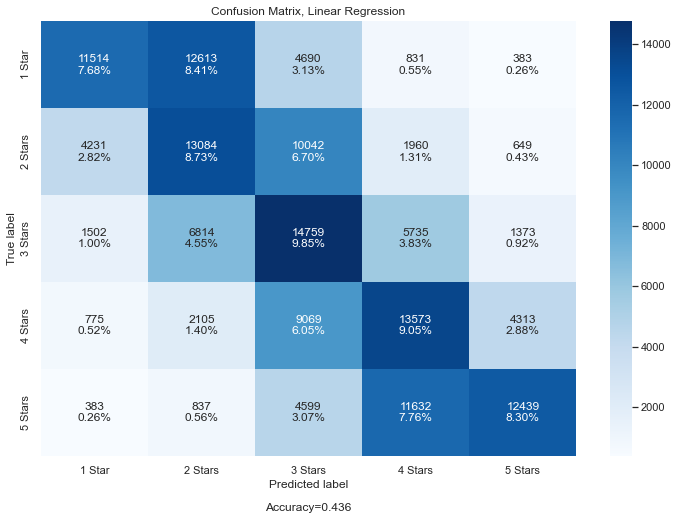

In [43]:
categories = ['1 Star','2 Stars','3 Stars','4 Stars','5 Stars']
title = 'Confusion Matrix, Linear Regression'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, figsize=(12,8), title = title)

### Naive Bayes

In [44]:
# Naive Bayes

In [161]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(tf_x_train, Y_train)
#predicted y
y_pred = naive_bayes_classifier.predict(tf_x_test)

In [162]:
y_pred

array([5, 2, 1, ..., 1, 1, 5])

In [163]:
accuracy_score(y_pred,Y_test)

0.5586604849738167

In [164]:
y_pred.mean()

2.854301057336313

In [165]:
unique, counts = np.unique(y_pred, return_counts=True)

In [166]:
np.asarray((unique, counts)).T

array([[    1, 31825],
       [    2, 35617],
       [    3, 28132],
       [    4, 31236],
       [    5, 23095]])

In [167]:
conf_matrix = confusion_matrix(Y_test, y_pred)

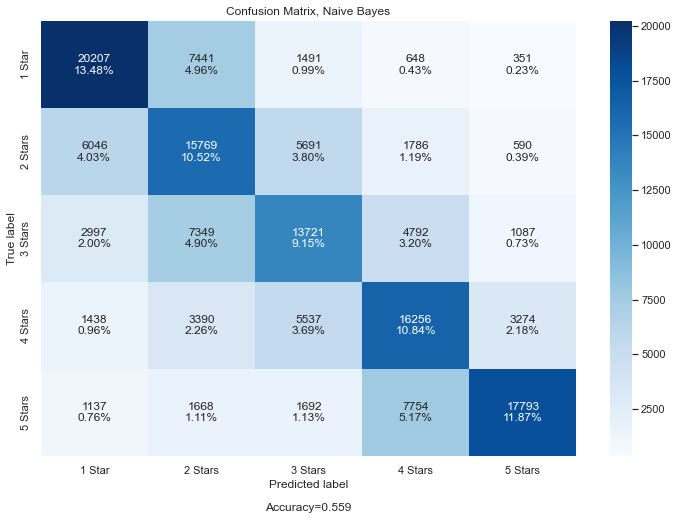

In [168]:
categories = ['1 Star','2 Stars','3 Stars','4 Stars','5 Stars']
title = 'Confusion Matrix, Naive Bayes'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, figsize=(12,8), title = title)

### Naive Bayes Unigram + Bigram

In [169]:
print('TFIDF Vectorizer……')
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer(ngram_range=(1,2)) 
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

TFIDF Vectorizer……


In [170]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(tf_x_train, Y_train)

MultinomialNB()

In [171]:
#predicted y
y_pred = naive_bayes_classifier.predict(tf_x_test)
print(accuracy_score(y_pred,Y_test))

0.5759581068009739


In [172]:
conf_matrix = confusion_matrix(Y_test, y_pred)

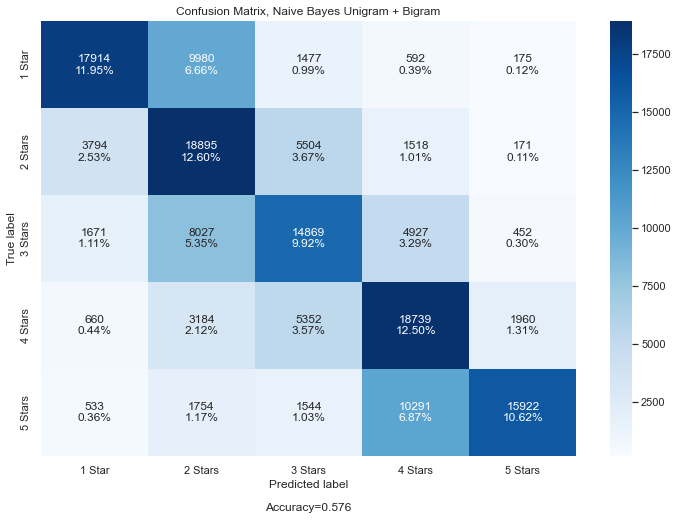

In [173]:
categories = ['1 Star','2 Stars','3 Stars','4 Stars','5 Stars']
title = 'Confusion Matrix, Naive Bayes Unigram + Bigram'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, figsize=(12,8), title = title)

### RandomForest

In [323]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_jobs=10)
classifier.fit(tf_x_train, Y_train)

In [ ]:
y_pred = classifier.predict(tf_x_test)

In [327]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.53      0.73      0.61     30031
           2       0.41      0.34      0.37     29966
           3       0.40      0.33      0.36     30183
           4       0.44      0.36      0.40     29835
           5       0.58      0.64      0.61     29890

    accuracy                           0.48    149905
   macro avg       0.47      0.48      0.47    149905
weighted avg       0.47      0.48      0.47    149905



In [371]:
conf_matrix = confusion_matrix(Y_test, y_pred)

In [372]:
accuracy_score(Y_test, y_pred)

0.48275240985957774

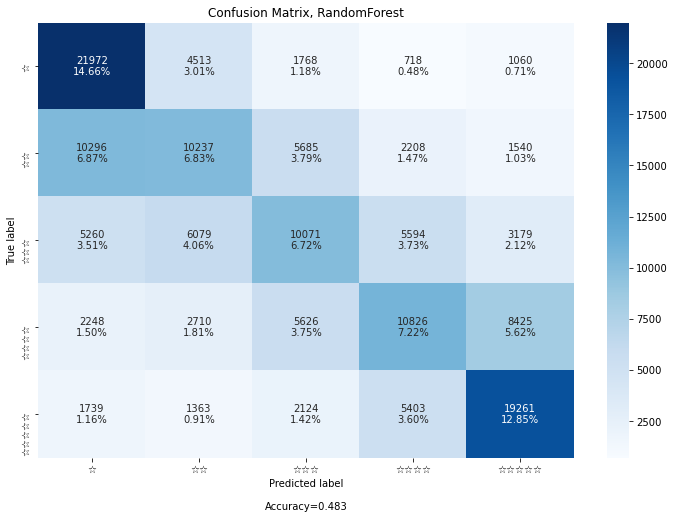

In [407]:
categories = ['1 Star','2 Stars','3 Stars','4 Stars','5 Stars']
title = 'Confusion Matrix, RandomForest'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, figsize=(12,8), title = title)

## Binary Prediction

### TFIDF

#### TFIDF - Unigram

In [174]:
X=df['clean_text'].apply(lambda x: ' '.join(x))
y=df['target']
X_train,X_test,Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Train:',X_train.shape,Y_train.shape,'Test:',(X_test.shape,Y_test.shape))

Train: (349777,) (349777,) Test: ((149905,), (149905,))


In [175]:
vectorizer= TfidfVectorizer(stop_words='english',ngram_range=(1,1)) #tf-idf matrix with unigram features only
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

In [176]:
print(vectorizer.get_feature_names_out()) 

['00' '000' '0000' ... 'zzzzzzzzzzzzzzzzzzzzzzzzz'
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz']


##### Naive Bayes

In [177]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(tf_x_train, Y_train)
#predicted y
y_pred = naive_bayes_classifier.predict(tf_x_test)

In [178]:
accuracy_score(y_pred,Y_test)

0.7830225809679464

In [179]:
conf_matrix = confusion_matrix(Y_test, y_pred)

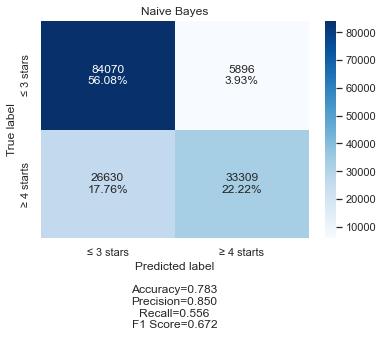

In [180]:
categories = ['≤ 3 stars','≥ 4 starts']
title = 'Naive Bayes'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, title = title, sum_stats = True)

##### Logistic Regression

In [181]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42,max_iter=10000).fit(tf_x_train, Y_train)
#predicted y
y_pred = clf.predict(tf_x_test)

In [182]:
accuracy_score(y_pred,Y_test)

0.8390513992195057

In [183]:
conf_matrix = confusion_matrix(Y_test, y_pred)

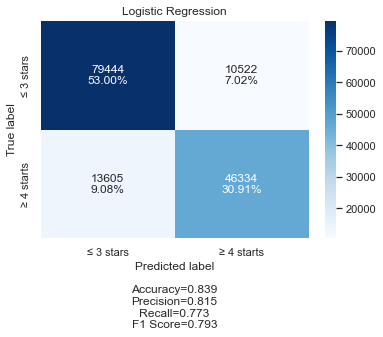

In [184]:
categories = ['≤ 3 stars','≥ 4 starts']
title = 'Logistic Regression'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, title = title, sum_stats = True)

#### TFIDF - Unigram + Bigram

In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
vectorizer= TfidfVectorizer(stop_words='english',ngram_range=(1,2)) #tf-idf matrix with unigram features only
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

#print(vectorizer.get_feature_names_out()) 



##### Naive Bayes

In [186]:
### TFIDF - Naive Bayes

from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(tf_x_train, Y_train)

MultinomialNB()

In [187]:
#predicted y
y_pred = naive_bayes_classifier.predict(tf_x_test)

print('NB accuracy:',accuracy_score(y_pred,Y_test))
print(confusion_matrix(Y_test, y_pred))

NB accuracy: 0.7369867582802442
[[87575  2391]
 [37036 22903]]


In [188]:
conf_matrix = confusion_matrix(Y_test, y_pred)

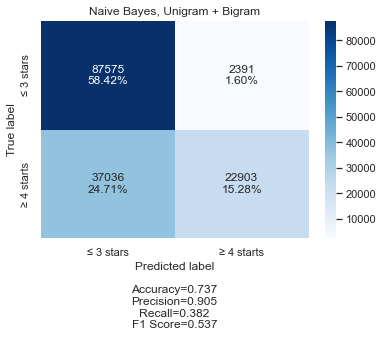

In [189]:
categories = ['≤ 3 stars','≥ 4 starts']
title = 'Naive Bayes, Unigram + Bigram'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, title = title, sum_stats = True)

##### Logistic Regression

In [190]:
### TFIDF - Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(tf_x_train, Y_train)

/Users/yiheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [191]:
#predicted y
y_pred = clf.predict(tf_x_test)

print('LR accuracy:',accuracy_score(y_pred,Y_test))
print(confusion_matrix(Y_test, y_pred))

LR accuracy: 0.8500183449518028
[[79939 10027]
 [12456 47483]]


In [192]:
conf_matrix = confusion_matrix(Y_test, y_pred)

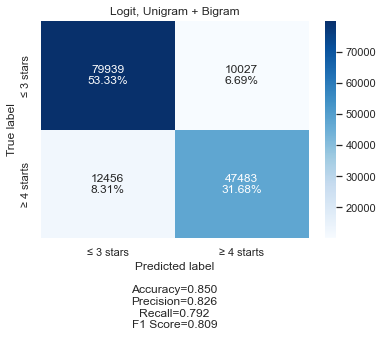

In [193]:
categories = ['≤ 3 stars','≥ 4 starts']
title = 'Logit, Unigram + Bigram'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, title = title, sum_stats = True)

### Bag of Words

#### Bag of Words - Unigram

In [194]:
### Unigram
print('BOW Unigram  ------------------------')
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
vectorizer= CountVectorizer(stop_words='english',ngram_range=(1,1)) #tf-idf matrix with unigram features only
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

# print(vectorizer.get_feature_names_out())

# tf_x_train.toarray()

BOW Unigram  ------------------------


##### Naive Bayes

In [195]:
### Naive Bayes

from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(tf_x_train, Y_train)

MultinomialNB()

In [196]:
#predicted y
y_pred = naive_bayes_classifier.predict(tf_x_test)

accuracy_score(y_pred,Y_test)

0.8042960541676395

In [197]:
conf_matrix = confusion_matrix(Y_test, y_pred)

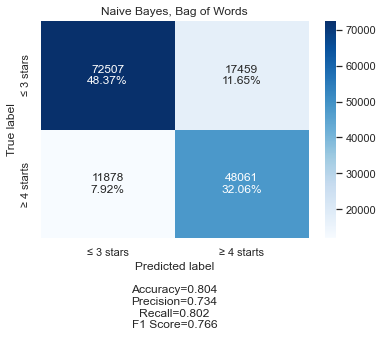

In [198]:
categories = ['≤ 3 stars','≥ 4 starts']
title = 'Naive Bayes, Bag of Words'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, title = title, sum_stats = True)

##### Logistic Regression

In [199]:
### Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(tf_x_train, Y_train)

/Users/yiheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [200]:
#predicted y
y_pred = clf.predict(tf_x_test)

accuracy_score(y_pred,Y_test)

0.827744238017411

In [201]:
conf_matrix = confusion_matrix(Y_test, y_pred)

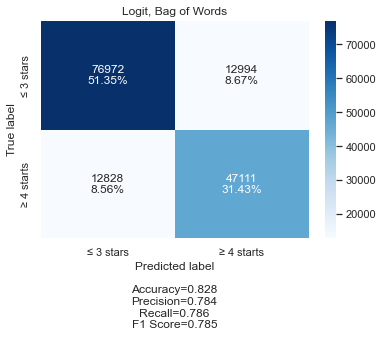

In [202]:
categories = ['≤ 3 stars','≥ 4 starts']
title = 'Logit, Bag of Words'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, title = title, sum_stats = True)

#### Bag of Words - Unigram + Bigram

In [203]:
###Unigram + Bigram
print('BOW Unigram + Bigram -------------------')
vectorizer= CountVectorizer(stop_words='english',ngram_range=(1,2)) #tf-idf matrix with unigram features only
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

print(vectorizer.get_feature_names_out()) 

BOW Unigram + Bigram -------------------
['00' '00 00' '00 0001' ... 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz oh'
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz woops'
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz']


##### Naive Bayes

In [204]:
### Naive Bayes

from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(tf_x_train, Y_train)

MultinomialNB()

In [205]:
#predicted y
y_pred = naive_bayes_classifier.predict(tf_x_test)

print('NB accuracy:',accuracy_score(y_pred,Y_test))

NB accuracy: 0.8202995230312531


In [206]:
conf_matrix = confusion_matrix(Y_test, y_pred)

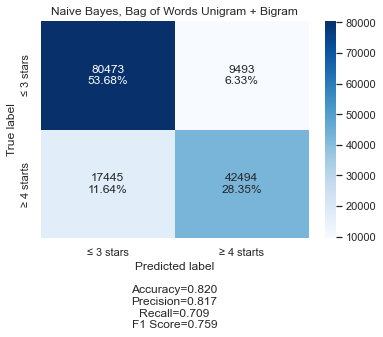

In [207]:
categories = ['≤ 3 stars','≥ 4 starts']
title = 'Naive Bayes, Bag of Words Unigram + Bigram'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, title = title, sum_stats = True)

##### Logistic Regression

In [208]:
### Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(tf_x_train, Y_train)


/Users/yiheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [209]:
#predicted y
y_pred = clf.predict(tf_x_test)

print('LR accuracy:',accuracy_score(y_pred,Y_test))

LR accuracy: 0.8420933257729896


In [210]:
conf_matrix = confusion_matrix(Y_test, y_pred)

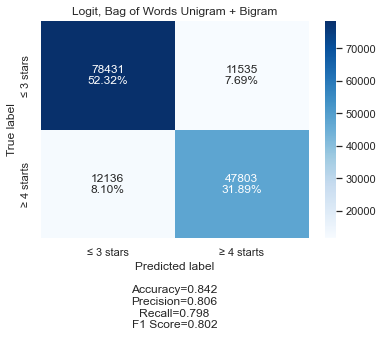

In [212]:
categories = ['≤ 3 stars','≥ 4 starts']
title = 'Logit, Bag of Words Unigram + Bigram'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, title = title, sum_stats = True)

### With Oversampled Data

#### TFIDF Unigram

In [37]:
from imblearn.over_sampling import SMOTE 
#from imblearn.under_sampling import RandomUnderSampler 
from cf_matrix import make_confusion_matrix

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
vectorizer= TfidfVectorizer(stop_words='english',ngram_range=(1,1)) #tf-idf matrix with unigram features only
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

In [32]:
smote = SMOTE(random_state= 42)
tf_x_train_uni,Y_train_uni = smote.fit_resample(tf_x_train,Y_train)
#print('Train:',X_train.shape,Y_train.shape,'Test:',(X_test.shape,Y_test.shape))

In [33]:
Y_train_uni.value_counts()

0    209680
1    209680
Name: target, dtype: int64

In [34]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(tf_x_train_uni, Y_train_uni)
#predicted y
y_pred = naive_bayes_classifier.predict(tf_x_test)

NB accuracy: 0.8032553950835529


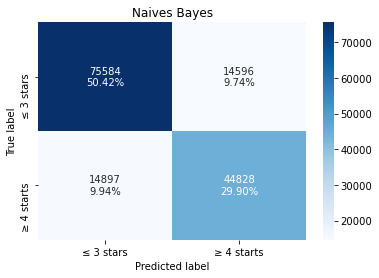

In [38]:
print('NB accuracy:',accuracy_score(y_pred,Y_test))
conf_matrix = confusion_matrix(Y_test, y_pred)
categories = ['≤ 3 stars','≥ 4 starts']
title = 'Naives Bayes'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, title = title, sum_stats = False)

In [39]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42,max_iter=10000).fit(tf_x_train_uni, Y_train_uni)
#predicted y
y_pred = clf.predict(tf_x_test)

LR accuracy: 0.825602881825156


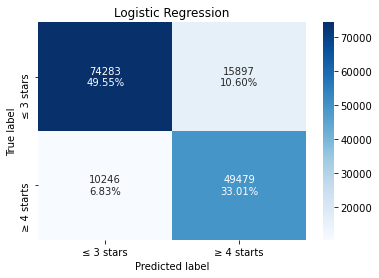

In [40]:
print('LR accuracy:',accuracy_score(y_pred,Y_test))
conf_matrix = confusion_matrix(Y_test, y_pred)
categories = ['≤ 3 stars','≥ 4 starts']
title = 'Logistic Regression'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, title = title, sum_stats = False)

#### TFIDF - Uni + Bi

NB accuracy: 0.807851639371602
LR accuracy: 0.8372502584970481


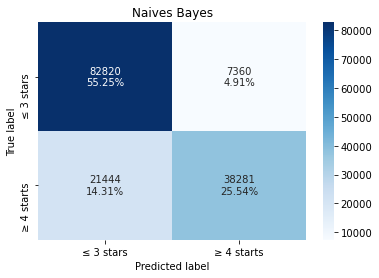

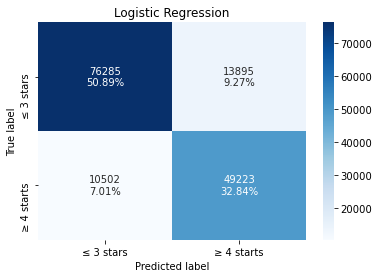

In [42]:
vectorizer= TfidfVectorizer(stop_words='english',ngram_range=(1,2)) #tf-idf matrix with unigram features only
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)
tf_x_train_ub,Y_train_ub = smote.fit_resample(tf_x_train,Y_train)
#print(vectorizer.get_feature_names_out()) 

### TFIDF - Naive Bayes

from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(tf_x_train_ub,Y_train_ub)
#predicted y
y_pred = naive_bayes_classifier.predict(tf_x_test)

print('NB accuracy:',accuracy_score(y_pred,Y_test))
conf_matrix = confusion_matrix(Y_test, y_pred)
categories = ['≤ 3 stars','≥ 4 starts']
title = 'Naives Bayes'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, title = title, sum_stats = False)
### TFIDF - Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42,max_iter=10000).fit(tf_x_train_ub,Y_train_ub)
#predicted y
y_pred = clf.predict(tf_x_test)

print('LR accuracy:',accuracy_score(y_pred,Y_test))
conf_matrix = confusion_matrix(Y_test, y_pred)
categories = ['≤ 3 stars','≥ 4 starts']
title = 'Logistic Regression'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, title = title, sum_stats = False)

In [43]:
Y_train_ub.value_counts()

0    209680
1    209680
Name: target, dtype: int64

#### Bag of words

BOW Unigram  ------------------------
NB accuracy: 0.7885594209666121
LR accuracy: 0.8138621126713586


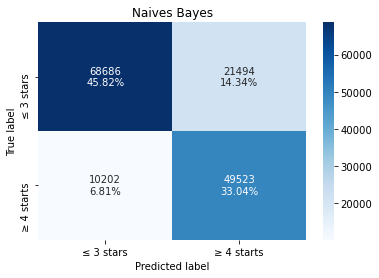

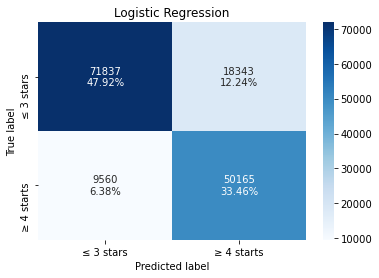

In [46]:
### Unigram
from sklearn.feature_extraction.text import CountVectorizer
print('BOW Unigram  ------------------------')
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
vectorizer= CountVectorizer(stop_words='english',ngram_range=(1,1)) #tf-idf matrix with unigram features only
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)
tf_x_train_uni,Y_train_uni = smote.fit_resample(tf_x_train,Y_train)

### Naive Bayes

from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(tf_x_train_uni, Y_train_uni)
#predicted y
y_pred = naive_bayes_classifier.predict(tf_x_test)
print('NB accuracy:',accuracy_score(y_pred,Y_test))
conf_matrix = confusion_matrix(Y_test, y_pred)
categories = ['≤ 3 stars','≥ 4 starts']
title = 'Naives Bayes'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, title = title, sum_stats = False)

### Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42,max_iter=10000).fit(tf_x_train_uni, Y_train_uni)
#predicted y
y_pred = clf.predict(tf_x_test)
print('LR accuracy:',accuracy_score(y_pred,Y_test))
conf_matrix = confusion_matrix(Y_test, y_pred)
categories = ['≤ 3 stars','≥ 4 starts']
title = 'Logistic Regression'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, title = title, sum_stats = False)

#### Bag of Words Unigram + Bigram

BOW Unigram + Bigram -------------------
NB accuracy: 0.8185517494413128
LR accuracy: 0.8317467729562056


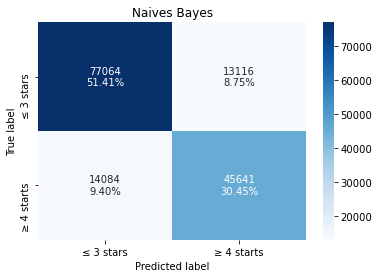

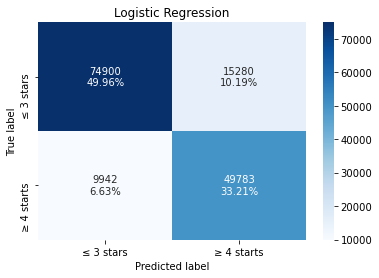

In [47]:
###Unigram + Bigram
print('BOW Unigram + Bigram -------------------')
vectorizer= CountVectorizer(stop_words='english',ngram_range=(1,2)) #tf-idf matrix with unigram features only
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)
tf_x_train_ub,Y_train_ub = smote.fit_resample(tf_x_train,Y_train)
#print(vectorizer.get_feature_names_out()) 

### TFIDF - Naive Bayes

from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(tf_x_train_ub,Y_train_ub)
#predicted y
y_pred = naive_bayes_classifier.predict(tf_x_test)

print('NB accuracy:',accuracy_score(y_pred,Y_test))
conf_matrix = confusion_matrix(Y_test, y_pred)
categories = ['≤ 3 stars','≥ 4 starts']
title = 'Naives Bayes'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, title = title, sum_stats = False)

### TFIDF - Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42,max_iter=10000).fit(tf_x_train_ub,Y_train_ub)
#predicted y
y_pred = clf.predict(tf_x_test)

print('LR accuracy:',accuracy_score(y_pred,Y_test))
conf_matrix = confusion_matrix(Y_test, y_pred)
categories = ['≤ 3 stars','≥ 4 starts']
title = 'Logistic Regression'
make_confusion_matrix(conf_matrix, cbar=True, categories = categories, title = title, sum_stats = False)